### Libraries


In [79]:
import pandas as pd
import numpy as np
import random
import os
import pickle
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt

### Subsample AG_NEWS

Starting from 120000 records in train / 7600 test with 4 classes we will obtain:
- train with 20k records
- text with 1264 records 

each class equally represented.

In [9]:
train_ag = pd.read_csv('/home2/sgrosso/data/AG_NEWS/train.csv', sep=',', header=None,
                       names=['class','title', 'description'])
test_ag = pd.read_csv('/home2/sgrosso/data/AG_NEWS/test.csv', sep=',', header=None,
                       names=['class','title', 'description'])

print('AG_NEWS train shape:', train_ag.shape)
print('AG_NEWS test shape:', test_ag.shape)

AG_NEWS train shape: (120000, 3)
AG_NEWS test shape: (7600, 3)


In [11]:
test_ag.head(5)

,class,title,description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [13]:
#TRAIN
#count of samples for each class
train_ag['class'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: class, dtype: int64

In [14]:
#TRAIN
#count of samples for each class
class_counts = train_ag['class'].value_counts()

subsample_size = class_counts // 6

# init subsampled train ds
ss_train = pd.DataFrame(columns=train_ag.columns)

# subsample for each class
for class_label, count in subsample_size.items():
    class_data = train_ag[train_ag['class'] == class_label]
    sampled_indices = class_data.sample(count).index
    ss_train = pd.concat([ss_train, train_ag.loc[sampled_indices]])

# Reset the index of the subsampled DataFrame
ss_train.reset_index(drop=True, inplace=True)

ss_train.shape

(20000, 3)

In [17]:
ss_train.to_csv('train.csv', index=False, header=False)

let's make the same thing for test

In [18]:
test_ag['class'].value_counts()

3    1900
4    1900
2    1900
1    1900
Name: class, dtype: int64

In [19]:
##TEST
#count of samples for each class
class_counts = test_ag['class'].value_counts()

subsample_size = class_counts // 6

# init subsampled train ds
ss_test = pd.DataFrame(columns=test_ag.columns)

# subsample for each class
for class_label, count in subsample_size.items():
    class_data = test_ag[test_ag['class'] == class_label]
    sampled_indices = class_data.sample(count).index
    ss_test = pd.concat([ss_test, test_ag.loc[sampled_indices]])

# Reset the index of the subsampled DataFrame
ss_test.reset_index(drop=True, inplace=True)

ss_test.shape

(1264, 3)

In [20]:
ss_test.to_csv('test.csv', index=False, header=False)

### Subsample cifar100

60k 32x32 images in total, 100 classes(grouped in 20 superclasses) and 600 images per class.
Starting from 50k images in train (500x100fine, 2500x20coarse) / 10k in test (100x100fine, 500x20coarse), we will obtain:
- train with 8300 records 
- text with 1600 records

In [92]:
meta_file_path = '/home2/sgrosso/data/cifar100/cifar-100-python/meta'
with open(meta_file_path, 'rb') as f:
    meta_data = pickle.load(f)

print(meta_data)


{'fine_label_names': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'w

In [42]:
print('keys in dict: ',meta_data.keys())
print('number of fine labels: ',len(meta_data['fine_label_names']))
print('number of coarse labels: ',len(meta_data['coarse_label_names']))

keys in dict:  dict_keys(['fine_label_names', 'coarse_label_names'])
number of fine labels:  100
number of coarse labels:  20


In [69]:
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        data_batch = pickle.load(f, encoding='bytes')
    return data_batch

train_data = load_cifar_batch('/home2/sgrosso/data/cifar100/cifar-100-python/train')
test_data = load_cifar_batch('/home2/sgrosso/data/cifar100/cifar-100-python/test')

In [74]:
train_images = train_data[b'data']
train_fine_labels = train_data[b'fine_labels']
train_coarse_labels = train_data[b'coarse_labels']

test_images = test_data[b'data']
test_fine_labels = test_data[b'fine_labels']
test_coarse_labels = test_data[b'coarse_labels']


Fine Label: television
Coarse Label: household_electrical_devices


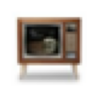

In [90]:
index = random.randrange(len(train_images))

# Extract labels
fine_label_index = train_fine_labels[index]
coarse_label_index = train_coarse_labels[index]

fine_label_name = meta_data['fine_label_names'][fine_label_index]
coarse_label_name = meta_data['coarse_label_names'][coarse_label_index]

# Reshape the image and create a PIL Image object
image_data = np.reshape(train_images[index], (3, 32, 32)).transpose(1, 2, 0)
pil_image = Image.fromarray(image_data)

# Display the image using matplotlib with a smaller size
plt.figure(figsize=(1, 1))  # Set the figure size to 32x32 pixels
plt.imshow(pil_image)
print(f"Fine Label: {fine_label_name}\nCoarse Label: {coarse_label_name}")
plt.axis('off')
plt.show()

In [60]:
num_images_to_keep = len(train_images) // 6 

In [61]:
def group_indices_by_label(labels):
    label_indices = defaultdict(list)
    for idx, label in enumerate(labels):
        label_indices[label].append(idx)
    return label_indices

train_fine_label_indices = group_indices_by_label(train_fine_labels)
train_coarse_label_indices = group_indices_by_label(train_coarse_labels)

test_fine_label_indices = group_indices_by_label(test_fine_labels)
test_coarse_label_indices = group_indices_by_label(test_coarse_labels)

In [62]:
def sub_sample_indices(label_indices, num_to_keep):
    sampled_indices = []
    for label, indices in label_indices.items():
        num_samples_for_label = int(num_to_keep * len(indices) / len(train_images))
        sampled_indices.extend(indices[:num_samples_for_label])
    return sampled_indices

train_sampled_indices = sub_sample_indices(train_fine_label_indices, num_images_to_keep)
test_sampled_indices = sub_sample_indices(test_fine_label_indices, num_images_to_keep)

# Estrai le immagini e le etichette sottocampionate
subsampled_train_images = train_images[train_sampled_indices]
subsampled_train_fine_labels = np.array(train_fine_labels)[train_sampled_indices]
subsampled_train_coarse_labels = np.array(train_coarse_labels)[train_sampled_indices]

subsampled_test_images = test_images[test_sampled_indices]
subsampled_test_fine_labels = np.array(test_fine_labels)[test_sampled_indices]
subsampled_test_coarse_labels = np.array(test_coarse_labels)[test_sampled_indices]


In [69]:
from collections import Counter

# Stampa il conteggio delle ripetizioni per ciascun numero
for numero, conteggio in Counter(subsampled_train_coarse_labels).items():
    print(f"Il numero {numero} appare {conteggio} volte")


Il numero 11 appare 415 volte
Il numero 15 appare 415 volte
Il numero 4 appare 415 volte
Il numero 14 appare 415 volte
Il numero 1 appare 415 volte
Il numero 5 appare 415 volte
Il numero 18 appare 415 volte
Il numero 3 appare 415 volte
Il numero 10 appare 415 volte
Il numero 17 appare 415 volte
Il numero 2 appare 415 volte
Il numero 9 appare 415 volte
Il numero 8 appare 415 volte
Il numero 16 appare 415 volte
Il numero 6 appare 415 volte
Il numero 12 appare 415 volte
Il numero 19 appare 415 volte
Il numero 7 appare 415 volte
Il numero 13 appare 415 volte
Il numero 0 appare 415 volte


In [73]:
print('train from', train_images.shape, 'to', subsampled_train_images.shape)
print('test from', test_images.shape, 'to', subsampled_test_images.shape)

train from (50000, 3072) to (8300, 3072)
train from (10000, 3072) to (1600, 3072)


### Subsample Flickr30k

### Subsample MSCOCO